# Logistic Regressions

Linear regressions are often the base on which we build on. In the real world, we often require more sophisticated non-linear models. i.e. quadratic or logistic.

A logistic regression implies that the possible outcomes are categorical, rather than numerical.

In a business context, decision making often boils down to a yes / no situation.

Using linear regression we can make a prediction about what price a customer will pay for a good, but will they buy at all? Using logistic regressions we can make a much more fundamental forecast - will the customer buy at all?

## Basics of logistic regressions

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the data

In [3]:
raw_data = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S36_L236/2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


Like dummies, we must convert the yes and nos to 1s and 0s to be able to work with the dataset properly.

In [4]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### Variables

In [5]:
y = data['Admitted']
x1 = data['SAT']

### Let's plot the data

#### Scatter plot

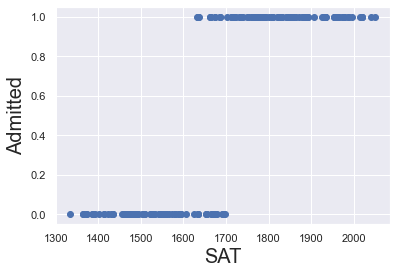

In [7]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

### Plot with a regression line

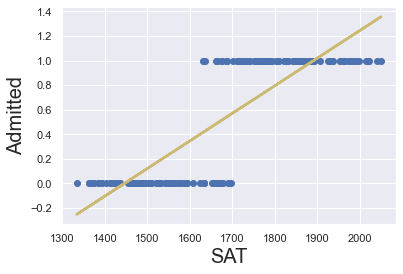

In [8]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color = 'C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

This regression predicts values that are outside the realms of possibility. It doesnt even know that our values are bounded between 0 and 1. linear regression is great, its just simply not great for tihs type of analysis. Our data is not linear, which is the first assumption of OLS and it is violated here. We must use non-linear approaches.

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


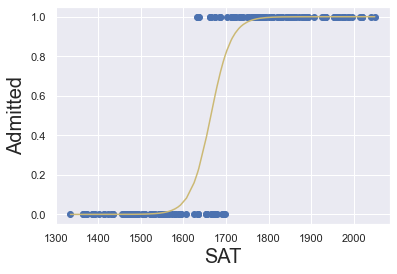

In [10]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

When the SAT score is relatively low, the prob of getting admitted is 0. When the SAT score is high, the prob of getting admitted is 1. A score between 1600 and 1750 is uncertain, so a probability is associated with it. A score of 1700, you have 0.8 chance of getting in. 

This is a logistic regression curve, applying logistic regression.

## Logistic regression assumptions

- Non linearity
- No endogeneity
- Normality and homoscedasticity
- No autocorrelation
- No multicollinearity

Very close to those of linear regressions, main diff is lineararity.

The logistic regression predicts the probability of an event occuring. Given input data, what is probability of event occuring. 

We call it logistic as the curve is defined by a logistic function. It has an S shape and is bounded by 0 and 1. 

The logistic regression model can be seen in the function defined below:

In [12]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1+np.exp(b0+x*b1)))

The logit model is a more elegant model (google it).

How do you interperet the coefficients of a logistic regression?

## Basics of logistic regression

### Import the relevant libraries

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the data

In [14]:
raw_data = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S36_L236/2.01. Admittance.csv')

In [15]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### Declare the dependent and the independent variables

In [16]:
y = data['Admitted']
x1 = data['SAT']

### Regression

In [19]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


It is possible that the regression wont find the value. Maximum runs in sm is 35

### Summary

In [20]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 18 May 2020   Pseudo R-squ.:                  0.7992
Time:                        12:49:56   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

MLE: Maximum likelihood estmation = a function which estimatees how likely it is that the model at hand describes the real underlying relationship of the variables. The bigger the likelihood function, the higher the probability that our model is correct. MLE tries to maximise the likelihood function. The computer is going through different values until it finds a model for which the likelihood is the highest. WHen it can no longer improve it, it will just stop the optimisation.

Log-likelihood: The value of the log-likelihood is almost but not always negative. The higher the better. This is more commonly used.

LL-Null: Log likelihood-null = log-likelihood of a model that has no independent variables. 

You might want to compare log-likelihood of model with LL-null, to see if model has any explanatory power.

The F-test was helpful in linear regression to understand if it was useful, in logistic reressions, the LLR (log likelihood ratio) p-value offers that info. It measures if our model is statistically different from LL-null, aka a useless model. As this value is significantly low, our model is useful.

Pseudo R-squared: there is no clearly defined r-squared for logistic regression. This one is actually called mcFadden's r-squeared. a good score is between 0.2 and 0.4. The measure is mostly useful for comparing variations of the same model. Different models will have completely different and incomparable pseudo r-squares.



SAT - Admittance regression 

log (pi / 1 - pi) = -69.91 + 0.042 * SAT

-69.91 comes from the const coef <br>
0.042 comes from the SAT coef

### Binary Predictors

In the same way we created dummies for a linear regression, we can use binary predictors in a logistic regression.

In [22]:
raw_data = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S36_L244/2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [23]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Female':1,'Male':0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


### Declare the dependent and independent variables

In [24]:
y = data['Admitted']
x1 = data['Gender']

### Regression

In [25]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 18 May 2020   Pseudo R-squ.:                  0.1659
Time:                        13:08:04   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

The LLR p-value and Gender P>|z| value are both sufficiently small to say that the model and variable are significant.

log(odds) = -0.64 - 2.08 * Gender

log(odds2) = -0.64 + 2.08 * Gender2

log(odds1) = -0.64 + 2.08 * Gender1

log(odds2/odds1) = 2.08 * (Gender2 - Gender1)

log(odds2/odds1) = 2.08

odds2 (female) = 7.99 * odds1 (male)

In [26]:
np.exp(2.0786)

7.993270498536442

The noted logic gets the same result as the expected value of feeding in the Gender coef.

### Regression with two predictors

In [27]:
y = data['Admitted']
x1 = data[['SAT','Gender']]

In [28]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 18 May 2020   Pseudo R-squ.:                  0.8249
Time:                        13:12:41   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

This regression has a much higher log-likelihood than the previous model, meaning it is a better one. SAT Is an outstanding predictor. The gender variable is significant, but no longer has 3 zeros. 

In [29]:
np.exp(1.9449)

6.992932526814459

Given the same SAT score, a female is 7 times more likely to be admitted than a male.

### Calculating the Accuracy of the Model

We have a model that predicts values and we have the actual values, so we can predict the accuracy.


In [31]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict() # predicted values

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

This array shows probabilities of admission. 1 = 100% probability of getting admitted. We can round the probabilities to say that above 0.5 means that admission is likely, and below 0.5 means admission is unlikely.

In [32]:
np.array(data['Admitted']) # actual values

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

If 80% of the predicted values coincide with the actual values, we say that the model has 80% accuracy

In [33]:
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [37]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df # confusion matrix

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


This shows how confused our model is...

For 69 observations, the model predicted 0 when the actual value was 0, and for 90 observations, the model predicted 1 when the actual value was 1. The model predicted 159 correct out of 168. 94.6% accuracy.

In [41]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

This code above does that maths for us.

### Overfitting

What is overfitting and how do we deal with it?

Underfitting and overfitting are related, they help us understand the other.

Overfitting means our training has focused on the particular training set so much it has missed the point. 

Underfitting has not captured the underlying logic of the data.

You can fix for overfitting by splitting the data into training and test data. The model cannot overfit as it doesnt have all the data.

### Testing the model and accessing its accuracy

Testing is done on a dataset the model has never seen before.

In [42]:
test = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S36_L249/2.03. Test dataset.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


Splitting the data is almost a compulsory task.

In [43]:
test['Admitted'] = test['Admitted'].map({'Yes':1,'No':0})
test['Gender'] = test['Gender'].map({'Female':1,'Male':0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


We will use our model to make predictions on the test data, then compare with the actual outcome to calcualte the accuracy.

In [44]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


Order of cols is very important as coefficients of the reg will expect it.

In [45]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


Now the columns are the same.

In [46]:
def confusion_matrix(data,actual_values,model):
    
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [47]:
cm = confusion_matrix(test_data,test_actual,results_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)


array is confusion matrix, float is accuracy

Almost always, the training accuracy is higher than the test accuracy, usually because of overfitting.

In [48]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


The opposite of accuracy is the misclassification rate.

In [49]:
print('Missclassification rate: '+str((1+1)/19))

Missclassification rate: 0.10526315789473684
